**installations**

In [ ]:
pip install langchain chromadb pandasai

**Loading in the csv**

In [3]:
from langchain.document_loaders import CSVLoader

loader = CSVLoader("cleaned_good_stuff.csv")
documents = loader.load()


**establishing the embedding model**

In [ ]:
from langchain_community.embeddings import OllamaEmbeddings

embeddings = OllamaEmbeddings(model='nomic-embed-text')

**storing the embeddings into a vector database**

In [5]:
from langchain.vectorstores import Chroma

chroma_db = Chroma.from_documents(
    documents, embeddings, persist_directory="./chroma_db"
)
chroma_db.persist()

**establishing the LLM and its prompt template**

these are some of the prompt templates i have made. Replace the template field with the the text below.


**Prompt for CRM:**

"Role: You are a Customer Relations Manager. Identify key details and patterns within the reviews in order to answer the user questions. Given this context: {context}, please directly answer the question: {question}.",

     
     
**Prompt for RND:**

"Role: You are a Research and Development Specialist. Identify key insights and patterns within the reviews in order to answer the user questions. Given this context: {context}, please directly answer the question: {question}.",



     

In [32]:
from langchain.llms import Ollama
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA

llm = Ollama(model="command-r")

prompt_template = PromptTemplate(
    input_variables=["context"],
    template="Given this context: {context}, please directly answer the question: {question}.",
)

qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=chroma_db.as_retriever(search_kwargs={"k": 30},),
    chain_type_kwargs={"prompt": prompt_template},
)

**provides the result in json format**

In [11]:
question = "what are the top 5 reasons customers are dissatisfied with our products? Give me examples of these reviews from the csv"
result = qa_chain({"query": question})
print(result)

{'query': '...', 'result': '...}

**provides result in a proper format**

In [33]:
question = "from the reviews, how do the consumers know the products do not last as long as advertised?"
result = qa_chain({"query": question})

# Extracting the result text
text = result["result"]

# Remove numbering and "\n" characters
formatted_text = '\n'.join([line.split('. ')[1] for line in text.split('\n') if '. ' in line])

# Printing the question and formatted answer
print("Question:", result["query"])
print()
print("Answer:", formatted_text)

Question: from the reviews, how do the consumers know the products do not last as long as advertised?

Answer: Some customers report that certain items like the Small Spaces air fresheners only last half as long as expected while others claim the car vent clips last "a long time."
Meanwhile, the car air fresheners appear to last longer in situations where the scent isn't constantly being adjusted, with one customer reporting that theirs lasted over two months.
For instance, one reviewer states that their air freshener was only half full at purchase which led them to believe it didn't last as long as advertised, however, another customer points out that this is likely due to the oil settling during shipping.


**loading in csv into pandas**

In [8]:
import pandas as pd
data = pd.read_csv("cleaned_good_stuff.csv")
data.head()

,PILLAR,date,text_rating,text_review
0,Car,2018-06-11,3.0,Good price Worked as expected. The scent is lo...
1,Car,2018-11-13,1.0,"Air Freshener, Car Vent, Do Not Buy Th..."
2,Car,2018-11-14,5.0,Great product Good and pleasant smell keep my ...
3,Car,2018-11-14,4.0,Great for small spaces ie car I smoke cigarett...
4,Car,2018-11-25,5.0,Lasts long and not too overpowering On the fir...


**establishing model**

In [9]:
from langchain_community.llms.ollama import Ollama
llm = Ollama(model="command-r")

In [10]:
from pandasai import SmartDataframe
df = SmartDataframe(data, config={"llm": llm})

**querying the model inorder to generate analytics**

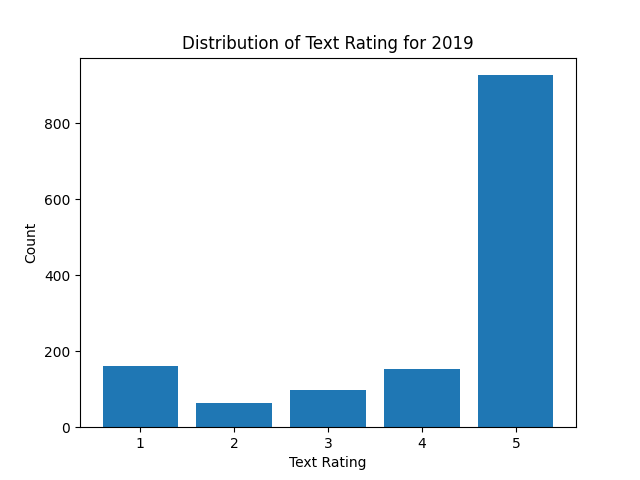

'/workspace/nemo/successful/last3/exports/charts/temp_chart.png'

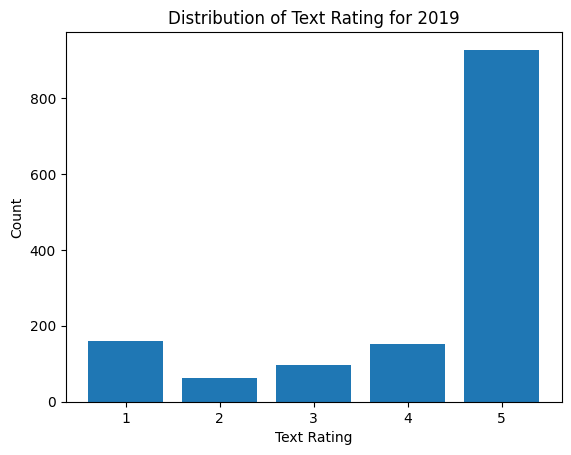

In [32]:
df.chat('distribution of text_rating for 2019')